In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path("../../OBF").resolve()))


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obf.dataloader import gaze_loader
from obf.utils.signal_visualization import show_signal

In [8]:
data_folder = Path("../data").resolve()
cols = ['ParticipantID','XAvg','YAvg','event','tSample']
gaze_df = pd.read_csv(Path(data_folder,Path("sample","EML1_003.csv")), usecols=cols)
y_df = pd.read_csv(Path(data_folder,"EML1_pageLevel.csv"))

In [9]:
y_df

,ParticipantID,Text,PageNum,datetime,unix_start,unix_end,readtime,MW,SVT,Rote_X,Inference_X,Deep_X,Rote_Y,Inference_Y,Rote_Z,Inference_Z,Deep_Z,Rote_D,Inference_D
0,EML1_001,Bias,1,NaN,NaN,NaN,34.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,EML1_001,Bias,2,NaN,NaN,NaN,14.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EML1_001,Bias,3,NaN,NaN,NaN,33.862,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EML1_001,Bias,4,NaN,NaN,NaN,17.676,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,EML1_001,Bias,5,NaN,NaN,NaN,20.174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,EML1_138,Variables,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
7973,EML1_138,Variables,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
7974,EML1_138,CausalClaims,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
7975,EML1_138,CausalClaims,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
gaze_df[gaze_df['ParticipantID'] == "EML1_003"]
y_df[y_df['ParticipantID'] == "EML1_003"]

,ParticipantID,Text,PageNum,datetime,unix_start,unix_end,readtime,MW,SVT,Rote_X,Inference_X,Deep_X,Rote_Y,Inference_Y,Rote_Z,Inference_Z,Deep_Z,Rote_D,Inference_D
88,EML1_003,Bias,1,2020-06-16 14:27:42.529,1.592339e+09,1.592339e+09,98.227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
89,EML1_003,Bias,2,2020-06-16 14:29:20.759,1.592339e+09,1.592339e+09,28.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,EML1_003,Bias,3,2020-06-16 14:29:48.917,1.592339e+09,1.592339e+09,65.599,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,EML1_003,Bias,4,2020-06-16 14:33:05.724,1.592340e+09,1.592340e+09,68.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,EML1_003,Bias,5,2020-06-16 14:34:14.681,1.592340e+09,1.592340e+09,84.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,EML1_003,Bias,6,2020-06-16 14:35:39.039,1.592340e+09,1.592340e+09,78.565,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,1.0
94,EML1_003,Bias,7,2020-06-16 14:36:57.605,1.592340e+09,1.592340e+09,72.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
95,EML1_003,Bias,8,2020-06-16 14:38:09.809,1.592340e+09,1.592340e+09,70.518,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
96,EML1_003,Bias,9,2020-06-16 14:39:20.329,1.592340e+09,1.592340e+09,59.082,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
97,EML1_003,Bias,10,2020-06-16 14:43:45.476,1.592340e+09,1.592340e+09,62.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Create column to join on
def get_id(row):
    return f"{row['ParticipantID']}-{row['Text']}{str(row['PageNum']-1)}"
def get_event_page(row):
    return f"{row['Text']}{str(row['PageNum']-1)}"

y_df['id'] = y_df.apply(lambda row: get_id(row),axis=1)

In [12]:
y_df['event_page'] = y_df.apply(lambda row: get_event_page(row),axis=1)

In [13]:
def convert_to_sample_rate(df,current,target):
    step_size = round(current/target)
    num_rows=len(df)
    sampled_df = df.iloc[np.arange(0,num_rows,step=step_size)]
    return sampled_df

    

In [14]:
sampled_gaze_df = convert_to_sample_rate(gaze_df,1000,60)

In [15]:
def match_data(x_df,y_df,col='Rote_X'):
    filtered_y = y_df.loc[pd.notna(y_df[col])]
    full_df = filtered_y.merge(x_df,left_on=['ParticipantID','event_page'],right_on=['ParticipantID','event'],validate='one_to_many')
    return full_df

In [16]:
matched_df = match_data(sampled_gaze_df,y_df)

In [17]:
def get_time_signal(df):

    min_tsample_df = df.groupby('event').min('tSample').rename(columns={"tSample":"min_tSample"})
    min_tsample_df = min_tsample_df.filter(items=['event','min_tSample']).reset_index()
    res_df = df.merge(min_tsample_df,on='event')
    res_df['t'] = res_df['tSample'] - res_df['min_tSample']
    return res_df


In [18]:
res_df = get_time_signal(matched_df)

In [19]:
# Stats of setup
screen_res = (1920,1080)
screen_size = (525.78,297.18)
subject_dist = 989
screen_center = (screen_res[0]//2,screen_res[1]//2)

# Things they use
NA_FLAG = -180 # Flag for off screen gaze

In [20]:
import math
# They seem to only use the y_axis to compute the visual angle, but this seems like it could be a problem?
def get_pixels_per_degree(screen_res,screen_size,subject_dist):
    mm_per_pixel = screen_size[1] / screen_res[1]
    # x_pixels_per_degree = screen_res[0]/math.degrees(2*math.atan2(screen_size[0],(2*subject_dist)))
    # y_pixels_per_degree = screen_res[1]/math.degrees(2*math.atan2(screen_size[1],(2*subject_dist)))
    x_pixels_per_degree = screen_res[0]/math.degrees(2*np.arctan2(screen_size[0],(2*subject_dist)))
    y_pixels_per_degree = screen_res[1]/math.degrees(2*np.arctan2(screen_size[1],(2*subject_dist)))
    return x_pixels_per_degree,y_pixels_per_degree

def get_screen_limits(screen_res,pixels_per_deg):
    x_degrees = screen_res[0] / pixels_per_deg[0]
    y_degrees = screen_res[1] / pixels_per_deg[1]
    return x_degrees,y_degrees

def convert_to_angle(df,screen_center,pixel_degrees):
    data = df.copy()
    data['XAvg'] = (df['XAvg'] - screen_center[0]) / pixel_degrees[0]
    data['YAvg'] = (df['YAvg'] - screen_center[1]) / pixel_degrees[1]
    return data




In [21]:
x_pixels_per_deg, y_pixels_per_deg = get_pixels_per_degree(screen_res,screen_size,subject_dist)

In [22]:
x_pixels_per_deg,y_pixels_per_deg

(64.4910163456009, 63.19956134657273)

In [23]:
deg_lims = get_screen_limits(screen_res,(x_pixels_per_deg,y_pixels_per_deg))

In [24]:
deg_df = convert_to_angle(res_df,screen_center,get_pixels_per_degree(screen_res,screen_size,subject_dist))

In [25]:
def write_file_event(df,output_path):
    for event in df.event.unique():
        temp_df = df.loc[df['event']==event]  
        name = f'{temp_df["ParticipantID"].iloc[0]}-{event}.csv'
        temp_df.to_csv(Path(output_path, name),index=False)

def plot_data(df,event,t_lim=None,x_y_lim=None):
    temp_df = df.loc[df['event']==event]
    plt.plot(temp_df["t"], temp_df["XAvg"], label="x")
    plt.plot(temp_df["t"], temp_df["YAvg"], label="y")
    if t_lim:
        plt.xlim(t_lim)
    if x_y_lim:
        plt.ylim(x_y_lim)
    plt.legend()
    name = f'{temp_df["ParticipantID"].iloc[0]}-{event}.csv'
    plt.title(name)
    plt.show()    




In [26]:
deg_df.loc[deg_df['XAvg'].isna(),'XAvg'] = NA_FLAG
deg_df.loc[deg_df['YAvg'].isna(),'YAvg'] = NA_FLAG
signal = deg_df[['XAvg','YAvg']].to_numpy()

In [27]:
deg_lims

(29.771588490882394, 17.088726202979693)

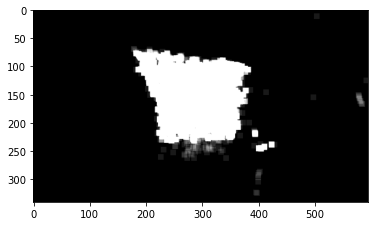

In [28]:
show_signal(signal,screen_width=deg_lims[0],screen_height=deg_lims[1])

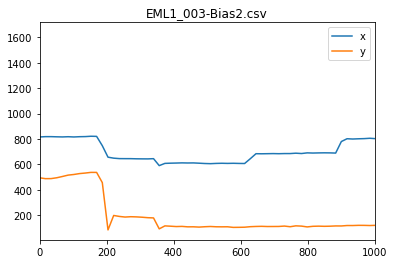

In [212]:
plot_data(res_df,"Bias2",t_lim=(0,1000))

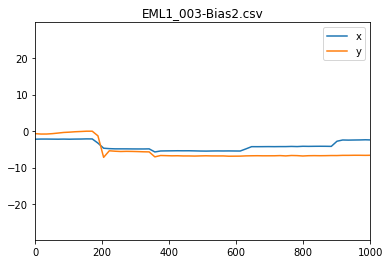

In [211]:
plot_data(deg_df,"Bias2",t_lim=(0,1000),x_y_lim=(-deg_lims[0],deg_lims[0]))

In [214]:
def preprocess_data(raw_data_path, output_folder, screen_res, target_frequency=60, current_frequency=1000,subject_dist=989,NA_FLAG=-180,debug=False):
    for file_path in raw_data_path.glob('*.csv'):
        df = pd.read_csv(file_path,usecols=['ParticipantID','XAvg','YAvg','event','tSample'])
        sampled_df = convert_to_sample_rate(df,current_frequency,target_frequency)
        pixels_per_deg = get_pixels_per_degree(screen_res,screen_size,subject_dist)
        sampled_df = convert_to_angle(sampled_df,(screen_res[0]//2,screen_res[1]//2),pixels_per_deg)
        # Set off screen gaze to NA_FLAG = -180 
        x_lim, y_lim = get_screen_limits(screen_res,pixels_per_deg)
        print(x_lim,y_lim)
        sampled_df.loc[sampled_df['XAvg'] < -x_lim, 'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['XAvg'] > x_lim, 'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'] < -y_lim, 'YAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'] > y_lim, 'YAvg'] = NA_FLAG
        # Set null vals (blinks) to NA_FLAG = -180
        sampled_df.loc[sampled_df['XAvg'].isna(),'XAvg'] = NA_FLAG
        sampled_df.loc[sampled_df['YAvg'].isna(),'YAvg'] = NA_FLAG

        # Get time signal
        res_df = get_time_signal(sampled_df)

        # Select Columns needed
        res_df = res_df.filter(items=['ParticipantID','XAvg','YAvg','event','t'])

        if debug:
            for event in df.event.unique():
                plot_data(res_df,event,t_lim=(0,5000),x_y_lim=(-x_lim,x_lim))
        # Write files
        else:
            write_file_event(res_df,output_folder)


            
        return res_df
        

        


        

        


In [ ]:
# Test
#preprocess_data(Path(data_folder,'samples'),'blah',screen_res=screen_res,debug=True)

In [216]:
# This runs whole data process
#preprocess_data(Path(data_folder,'samples'),Path(data_folder,"output"),screen_res=screen_res)

29.771588490882394 17.088726202979693


,ParticipantID,XAvg,YAvg,event,t
0,EML1_003,8.290302,-0.850481,Hypotheses0,0
1,EML1_003,8.287976,-0.784816,Hypotheses0,17
2,EML1_003,8.268594,-0.746841,Hypotheses0,34
3,EML1_003,8.245334,-0.859183,Hypotheses0,51
4,EML1_003,8.286425,-0.902696,Hypotheses0,68
...,...,...,...,...,...
127730,EML1_003,-2.781007,-3.539582,Validity9,43010
127731,EML1_003,-3.895116,-5.500038,Validity9,43027
127732,EML1_003,-4.316880,-6.519824,Validity9,43044
127733,EML1_003,-4.474267,-7.101315,Validity9,43061


### Load data for training

In [36]:
import dask.dataframe as dd
import os
import random


In [30]:
class Dataset():
    def __getitem__(self,idx):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError

        

In [31]:
df = dd.read_csv(os.path.join(Path(data_folder,"output"),"*.csv"))

In [32]:
df['id'] = df["ParticipantID"] + '-' + df['event']

In [37]:
def plot_sequence_length(folderpath,num=300):
    file_list = list(folderpath.resolve().glob("*.csv"))
    random_files = random.sample(file_list,num)
    sequence_lens = []
    for f in random_files:
        df = pd.read_csv(Path(folderpath,f).resolve())
        sequence_lens.append(len(df))
    plt.hist(sequence_lens,density=True,bins=30)
    plt.show()     
    return sequence_lens
        



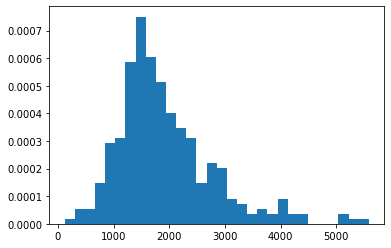

[1746,
 2154,
 989,
 2113,
 1656,
 1950,
 5586,
 1136,
 1531,
 3384,
 799,
 2963,
 1548,
 2392,
 1499,
 2296,
 2104,
 1411,
 2503,
 1663,
 1509,
 1855,
 2990,
 2764,
 1688,
 988,
 3379,
 2917,
 2993,
 1666,
 1428,
 1273,
 1305,
 1026,
 1309,
 2869,
 1603,
 1259,
 2761,
 1706,
 2022,
 1380,
 2738,
 2223,
 1033,
 1690,
 1775,
 2731,
 1958,
 2506,
 1511,
 1024,
 2095,
 3057,
 1508,
 1412,
 1316,
 1320,
 1106,
 2418,
 1824,
 1399,
 2682,
 2798,
 2940,
 1993,
 2941,
 1451,
 1545,
 1221,
 2074,
 1191,
 119,
 1725,
 1966,
 2281,
 2602,
 1880,
 2457,
 1270,
 1674,
 2756,
 2477,
 1280,
 1816,
 1766,
 1426,
 1939,
 1374,
 2256,
 2735,
 960,
 2359,
 1746,
 2982,
 1020,
 1525,
 1718,
 1814,
 1600,
 1215,
 1391,
 936,
 1161,
 4476,
 2841,
 655,
 1326,
 1915,
 2640,
 402,
 965,
 1558,
 1820,
 1326,
 906,
 1163,
 1403,
 1307,
 2090,
 3174,
 776,
 1922,
 1604,
 1637,
 1398,
 1895,
 1319,
 4358,
 2216,
 2097,
 1962,
 361,
 2228,
 3599,
 654,
 1761,
 2026,
 1929,
 1946,
 1281,
 1880,
 3602,
 1814,
 1051

In [38]:
plot_sequence_length(data_files)

In [150]:
class MultiFileDataset(torch.utils.data.Dataset):
    def __init__(self, folder_name, file_list=[], file_mapper=None, file_type="csv", transform_x=None, transform_y=None, label_mapper=None):
        '''
        Dataset for large data with multiple csv files.

        Args:
        folder_name (str): path to folder where csv files are for x data
        file_list (list[str]): list of filenames to use for dataset
        file_mapper (fn): Gives list of files in folder to use for the dataset. Returns filename as string
        file_type (str): file extension. This is only used if file_mapper is none
        transform_x (list[fns]): functions that are applied to the x_data
        label_file (str): path to file specifying labels for each file
        label_mapper (fn): maps list of files to labels. Returns list
        '''

        self.folder_name = Path(folder_name)
        
        # If their is a list passed then use it, else if function then use it, else use all files in folder
        if file_list:
            self.files = file_list
        elif file_mapper:
            self.files = file_mapper(str(self.folder_name.resolve()))
        else:
            self.files = self.folder_name.glob(f"*.{file_type}")

        self.files = sorted(self.files)
        self.transform_x = transform_x
        self.transform_y = transform_y
        if label_mapper:
            self.labels = label_mapper(self.files)

        self.cached_data = {}
        print(len(self.files),len(self.labels))

    def __len__(self):
        return len(self.files)
    
    def _get_file_path(self,filename):
        return str(Path(self.folder_name,filename).resolve())
    
    def __getitem__(self,idx):
        filename = self.files[idx]
        if self.labels:
            label=self.labels[idx]
        if filename in self.cached_data:
            x_data = self.cached_data[filename]
        else:
            filepath = self._get_file_path(filename)
            # Assumes data has header row
            x_data = np.loadtxt(open(filepath,"rb"),delimiter=",",skiprows=1,usecols=[1,2])
            self.cached_data[filename] = x_data
        #print(x_data,label)
        if self.transform_x:
            for tr in self.transform_x:
                x_data = tr(x_data)
        if self.transform_y:
            for tr in self.transform_y:
                label = tr(label)
        #print(f"This is the label:{label}")
        if self.labels:
            return x_data, label
        else:
            return x_data




            


In [151]:
def label_files(label_df,id_col,label_col,filenames):
    # Strip extension
    ids = [f.split(".")[0] for f in filenames]
    #labels = label_df.loc[label_df[id_col].isin(ids)][label_col]
    labels = [label_df.loc[label_df[id_col] == id][label_col].values[0] for id in ids]
    return labels

def get_filenames_for_dataset(label_df,folder,id_col,label_col,ext="csv"):
    files = label_df.loc[pd.notna(label_df[label_col])][id_col].to_list()
    label_filenames = set([f"{file}.{ext}" for file in files])
    folder_filenames = set([f.name for f in folder.glob('*.csv')])
    return list(label_filenames.intersection(folder_filenames))

# Beware shuffles input
def random_split_train_test(filenames, percentage=0.8):
    random.shuffle(filenames)
    train_len = int(len(filenames) *0.8)
    return filenames[:train_len], filenames[train_len:]

# What is a good method for choosing the sequence length?
def limit_sequence_len(x_data,sequence_len=3000,random_part=True):
    if len(x_data) > sequence_len:
        # Remove part data
        if random_part:
            start_idx = random.randint(0,len(x_data) - sequence_len)
            x_data = x_data[start_idx:start_idx+sequence_len]

    else:
        # Pad data
        padded_data = np.zeros((sequence_len,2))
        padded_data[:len(x_data)] = x_data
        x_data = padded_data
    return x_data


In [152]:
Rote_X_filenames = get_filenames_for_dataset(y_df,Path("../data/output").resolve(),"id","Rote_X")    
train_filenames, test_filenames = random_split_train_test(Rote_X_filenames)

In [153]:
from functools import partial
label_map = partial(label_files,y_df,'id','Rote_X')

In [172]:
import torch
train = MultiFileDataset(str(Path("../data/output").resolve()),train_filenames,transform_x=[limit_sequence_len,lambda data: torch.tensor(data).float()],transform_y=[lambda data: torch.tensor(data).float()], label_mapper=label_map)
test = MultiFileDataset(str(Path("../data/output").resolve()),test_filenames,transform_x=[limit_sequence_len,lambda data: torch.tensor(data).float()],transform_y=[lambda data: torch.tensor(data).float()],label_mapper=label_map)

1000 1000
251 251


In [173]:
train.__getitem__(1)

(tensor([[  -4.7355,   -4.8988],
         [-180.0000, -180.0000],
         [-180.0000, -180.0000],
         ...,
         [  -2.4135,    2.7223],
         [  -2.4313,    2.6677],
         [  -2.4406,    2.6685]]),
 tensor(0.))

In [174]:
train.files[1]

'EML1_003-Bias8.csv'

In [175]:
xs = []
lab = []
for i in range(4):
    xs.append(train.__getitem__(i)[0])
    lab.append(train.__getitem__(i)[1])
print(torch.stack(xs).shape)
print(torch.stack(lab).shape)

torch.Size([4, 3000, 2])
torch.Size([4])


### Training Model

In [176]:
from obf.model import ae
from obf.model import creator

import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix



In [177]:
# Directories
input_data_dir = str(Path("../data/output").resolve())
pre_train_dir = str(Path("../../OBF/pre_weights/sample_weights").resolve())
output_dir = str(Path("../results").resolve())


In [178]:
# Hyperparams
batch_size = 4
learning_rate = 0.001
epochs = 100
report_interval = 10
hidden_layers=[256,512]
use_cuda = torch.cuda.is_available()

In [179]:
# Tune the encoder if "tune" else "freeze" encoder and just train classifier
train_type = "freeze"

In [180]:
# Setup output
import datetime
from tensorboardX import SummaryWriter

time_str = datetime.datetime.now().strftime("%Y_%m_%d_%H.%M.%S")

checkpt_name = os.path.join(output_dir, time_str + ".txt")
log_dirname = os.path.join(output_dir, time_str + "_log")
model_save_path = os.path.join(log_dirname, "model.pt")


os.makedirs(log_dirname, exist_ok=True)


# Tensorboard writer
summary_writer = SummaryWriter(log_dir = log_dirname, flush_secs = 10)

In [181]:
# Create model
encoder = creator.load_encoder(pre_train_dir,use_cuda=use_cuda)
model = creator.create_classifier_from_encoder(encoder,hidden_layers=hidden_layers,n_output=1,dropout=0.5)
creator.print_models_info(["original encoder", "current model"], [encoder,model])

Loading:  /mnt/c/Users/rige3027/emotivelab/OBF/pre_weights/sample_weights/encoder_1633040995_gru.pt
ORIGINAL ENCODER ----------
There are Total Trainable 163358 parameters
Sequential(
  (0): CNNEncoder(
    (cnn): Sequential(
      (0): ConvBlock(
        (conv): Conv1d(2, 14, kernel_size=(7,), stride=(1,), padding=(3,))
        (pool_layer): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
        (bn): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): LeakyReLU(negative_slope=0.01)
      )
      (1): ConvBlock(
        (conv): Conv1d(16, 16, kernel_size=(7,), stride=(1,), padding=(3,))
        (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): LeakyReLU(negative_slope=0.01)
      )
    )
  )
  (1): RNNEncoder(
    (rnn): GRU(32, 128, num_layers=2, batch_first=True, dropout=0.1)
  )
)
CURRENT MODEL ----------
There are Total Trainable 362783 parameters
Sequential(
  (0): 

In [182]:
# Data Loaders
train_dl = torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True,drop_last=True)
test_dl = torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False,drop_last=True)

In [195]:
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import termcolor
#from tqdm import tqdm
def run_model(mode, model, dataloader, writer, epoch_id, optimizer=None):
  # mode is either "train" or "test" or "valid"
  assert( epoch_id is not None )

  criterion = nn.BCEWithLogitsLoss()

  if mode == "train": 
    model = model.train( True )
  else:
    model.eval()
    
  epoch_losses = []
  
  reals = []
  preds = []
  probs = []
  for signal, label in dataloader:
    
    signal = signal.float()
    label = label.unsqueeze(1)
    #print(signal.shape, label.shape)
    #label = label.long().reshape(-1)
    # pdb.set_trace()
    if use_cuda:  
      signal = signal.cuda()
      label = label.cuda()

    # pdb.set_trace()

    if mode == "train": 
      optimizer.zero_grad()

      if signal.shape[0] < 2:
        continue # batch norm needs more than 1 sample
 
    # forward + backward + optimize
    outputs = model(signal)
    loss = criterion(outputs, label)
    epoch_losses.append(loss.item())

    reals += label.cpu().numpy().tolist()
    #preds += torch.argmax(outputs, dim=1).detach().cpu().numpy().tolist()
    probs.append(torch.sigmoid(outputs).detach())
    preds += (outputs.detach().cpu().numpy() > 0.0).astype(float).tolist()

    if mode == "train":
      loss.backward()
      optimizer.step()

  total_loss = np.nanmean(epoch_losses)
  acc = np.sum(np.array(reals) == np.array(preds)) / len(reals)
  
  probs = torch.cat(probs, dim=0)
  #top_5_acc = top_k_accuracy(probs.detach().cpu().numpy(), reals, k=5)
  #f1 = f1_score(reals, preds, average="weighted")
  auc = roc_auc_score(reals, probs, average="weighted")

  
  writer.add_scalar(mode + "/loss", total_loss, epoch_id)
  writer.add_scalar(mode + "/acc", acc, epoch_id)
  #writer.add_scalar(mode + "/top_5_acc", top_5_acc, epoch_id)
 # writer.add_scalar(mode + "/f1", f1, epoch_id)
  writer.add_scalar(mode + "/auc", auc, epoch_id)
  writer.file_writer.flush()
  
  # print("#" * 50)
  if epoch_id % report_interval == 0 or epoch_id == epochs - 1:
    msg = "#" * 5 + "%s, Epoch: %d, Accuracy: %.2f, Loss: %.2f" % (mode, 
             epoch_id, acc, total_loss)

    if mode == "train":
      color = "red"
    elif mode == "valid":
      color = "yellow"
    else:
      color = "green"

    print(termcolor.colored(msg, color=color))
 
    # print("reals", reals, "preds", preds)
    # print(confusion_matrix(reals, preds))
  
  return acc

In [196]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

if train_type == "freeze":
  optimizer = optim.Adam(model[1:].parameters(), lr=learning_rate) # Freeze the Encoder
  print(termcolor.colored("We will FREEZE the encoder.", "blue"))
elif train_type == "tune":
  print(termcolor.colored("We will TUNE the WHOLE model.", "blue"))
else:
  raise "Unknown mode. It should be one of (tune, freeze, new)"  

We will FREEZE the encoder.


In [197]:
import tqdm
# %% Begin Training 
train_accs = []
#valid_accs = []
test_accs = []

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=max(1, int(epochs / 5)), gamma=0.5)
for epoch in tqdm.tqdm(range(epochs)):
  auc = run_model("train", model, train_dl, summary_writer, epoch_id = epoch, optimizer=optimizer)
  summary_writer.add_scalar( "train/learning_rate", scheduler.get_last_lr()[-1], epoch )

  scheduler.step()

  torch.save(model, model_save_path)

  with torch.no_grad():
    # valid_acc = run_model("valid", model, valid_loader, summary_writer, epoch_id=epoch)
     test_acc = run_model("test", model, test_dl, summary_writer, epoch_id=epoch)
     train_accs.append(auc)
    # valid_accs.append(valid_acc)
     test_accs.append(test_acc)


times = range(len(train_accs))
plt.plot(times, train_accs, color="blue", label="train", alpha=0.5)
#plt.plot(times, valid_accs, color="yellow", label="valid", alpha=0.5)
plt.plot(times, test_accs, color="red", label="test", alpha=0.5)
plt.legend()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

#####train, Epoch: 0, Accuracy: 0.71, Loss: 0.62


  1%|          | 1/100 [03:31<5:48:43, 211.35s/it]

#####test, Epoch: 0, Accuracy: 0.71, Loss: 0.60


  5%|▌         | 5/100 [18:30<6:00:08, 227.45s/it]

In [187]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit